<a href="https://colab.research.google.com/github/taynanmancilla/Taxa_de_Retorno_de_Acoes/blob/main/Taxa_de_Retorno_de_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAXAS DE RETORNO

## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
dataset = pd.read_csv('acoes.csv')

Vamos simular que compramos as ações da GOL, CVC, WEGE, MGLU, TOTS e BOVA no dia 02/01/2015 e vendemos elas no dia 03/11/2020, para efetuarmos os calculos de retorno

In [ ]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


## Taxa de Retorno Simples

Utilizamos a taxa de retorno simples quando o intuito é fazer o comparativo entre várias ações

In [ ]:
# Retornando o primeiro e o ultimo valor respectivamente
dataset['GOL'][0], dataset['GOL'][len(dataset)-1]

(14.989999771118164, 16.06999969482422)

Taxa de Retorno Simples:

 ((Ultimo - Primeiro) / Primeiro) * 100

 Vamos aplicar para todas as ações:

In [ ]:
((dataset['GOL'][len(dataset)-1] - dataset['GOL'][0]) / dataset['GOL'][0]) * 100

7.20480280317905

In [ ]:
((dataset['CVC'][len(dataset)-1] - dataset['CVC'][0]) / dataset['CVC'][0]) * 100

-18.28947215694469

In [ ]:
((dataset['WEGE'][len(dataset)-1] - dataset['WEGE'][0]) / dataset['WEGE'][0]) * 100

564.0948003568933

In [ ]:
((dataset['MGLU'][len(dataset)-1] - dataset['MGLU'][0]) / dataset['MGLU'][0]) * 100

10771.432407164248

In [ ]:
((dataset['TOTS'][len(dataset)-1] - dataset['TOTS'][0]) / dataset['TOTS'][0]) * 100

-21.83499100454833

In [ ]:
((dataset['BOVA'][len(dataset)-1] - dataset['BOVA'][0]) / dataset['BOVA'][0]) * 100

95.53535113014244

Tambem temos essa forma alternativa:

(Ultimo / Primeiro - 1) * 100

In [ ]:
(dataset['BOVA'][len(dataset)-1] / dataset['BOVA'][0] - 1) * 100

95.53535113014244

### Taxa de Retorno Diaria

.shift(n) desloca os valores "n" posições a frente

In [ ]:
dataset['GOL'].shift(1)

0             NaN
1       14.990000
2       14.850000
3       15.210000
4       14.550000
          ...    
1441    18.959999
1442    18.600000
1443    16.920000
1444    16.610001
1445    15.690000
Name: GOL, Length: 1446, dtype: float64

Criando uma nova coluna no data frame de Retorno Simples da ação da GOL atribuindo os valores de retorno diario:

In [ ]:
dataset['RS GOL'] = (dataset['GOL'] / dataset['GOL'].shift(1)) - 1
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998,NaN
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000,-0.009340
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002,0.024242
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002,-0.043392
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998,-0.019244
...,...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003,-0.018987
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000,-0.090323
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004,-0.018321
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004,-0.055388


Plotando as taxas de retorno diaria:

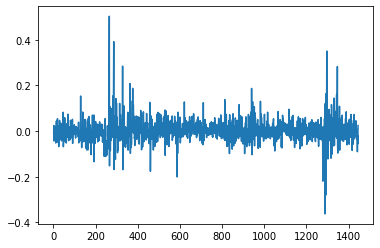

In [ ]:
dataset['RS GOL'].plot();

Media Diaria de Retorno:

Note que é um valor muito pequeno devido ao fato das taxas de retorno serem diarias, não havendo variações muito grande

In [ ]:
dataset['RS GOL'].mean()

0.0013511779768514381

### Taxa de Retorno Anual

Para retornar a taxa de retorno anual basta multiplicarmos a media da Coluna de Retorno Diario pela quantidade de dias que a bolsa de valores funciona no ano (Descontando finais de semana e feriados), que acaba sendo em torno de 246 dias

Para retornos trimestrais ou semestrais basta multiplicar pela quantidade de dias equivalentes

In [ ]:
(dataset['RS GOL'].mean() * 246) * 100

33.23897823054538

Agora valos aplicar para o restante das ações da carteira:

In [ ]:
# Colunas de Taxas de Retorno Diario Simples
dataset['RS CVC'] = (dataset['CVC'] / dataset['CVC'].shift(1)) - 1
dataset['RS WEGE'] = (dataset['WEGE'] / dataset['WEGE'].shift(1)) - 1
dataset['RS MGLU'] = (dataset['MGLU'] / dataset['MGLU'].shift(1)) - 1
dataset['RS TOTS'] = (dataset['TOTS'] / dataset['TOTS'].shift(1)) - 1
dataset['RS BOVA'] = (dataset['BOVA'] / dataset['BOVA'].shift(1)) - 1

Vamos aplicar as respectivas taxas de retorno anuais:

In [ ]:
(dataset['RS CVC'].mean() * 246) * 100

11.87607869173827

In [ ]:
(dataset['RS WEGE'].mean() * 246) * 100

38.35190660073094

In [ ]:
(dataset['RS MGLU'].mean() * 246) * 100

101.2429849201322

In [ ]:
(dataset['RS TOTS'].mean() * 246) * 100

10.43406825404327

In [ ]:
(dataset['RS BOVA'].mean() * 246) * 100

15.133989484068467

## Taxa de Retorno Logarítmica

Já a taxa de retorno logarítmica é usado quando o intuito é fazer comparação de uma mesma ação em períodos diferentes

Fórmula:

log(Final / Inicial) * 100

In [ ]:
np.log(dataset['GOL'][len(dataset)-1] / dataset['GOL'][0]) * 100

6.957086391347993

In [ ]:
np.log(dataset['CVC'][len(dataset)-1] / dataset['CVC'][0]) * 100

-20.1987332655722

In [ ]:
np.log(dataset['WEGE'][len(dataset)-1] / dataset['WEGE'][0]) * 100

189.32547249192717

In [ ]:
np.log(dataset['MGLU'][len(dataset)-1] / dataset['MGLU'][0]) * 100

468.8723561633508

In [ ]:
np.log(dataset['TOTS'][len(dataset)-1] / dataset['TOTS'][0]) * 100

-24.63480938759514

In [ ]:
np.log(dataset['BOVA'][len(dataset)-1] / dataset['BOVA'][0]) * 100

67.0571001285707

### Taxa de Retorno Diaria

Criando uma nova coluna no data frame de Retorno Logaritmo (RL) da ação da GOL atribuindo os valores de retorno diario:

Note que utilizamos o .shift() assim como no Retorno Simples

In [ ]:
dataset['RL GOL'] = np.log(dataset['GOL'] / dataset['GOL'].shift(1))
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA,RL GOL
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890,-0.009383
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613,0.023953
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705,-0.044362
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477,-0.019432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003,-0.018987,-0.018018,0.005921,-0.000785,0.008136,-0.010024,-0.019170
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000,-0.090323,-0.098800,-0.049255,-0.032220,-0.035088,-0.035177,-0.094665
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004,-0.018321,-0.007048,0.011246,0.029639,0.036364,0.005193,-0.018491
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004,-0.055388,-0.031546,-0.052480,-0.028786,-0.052632,-0.024217,-0.056981


Esse grafico é bom para analisarmos se a empresa teve mais retornos negativos ou positivos

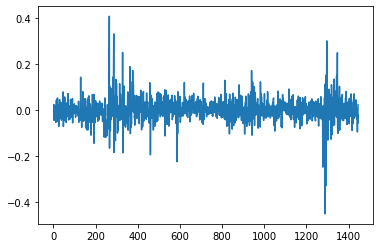

In [ ]:
dataset['RL GOL'].plot();

Como ja visto, esse retorno diário acaba sendo um valor mais baixo:

In [ ]:
dataset['RL GOL'].mean()

4.814592658372141e-05

### Taxa de Retorno Anual

Média de retorno anual:

In [ ]:
(dataset['RL GOL'].mean() * 246) * 100

1.184389793959547

Agora valos aplicar os Retornos Logaritmos para o restante das ações da carteira:

In [ ]:
dataset['RL CVC'] = np.log(dataset['CVC'] / dataset['CVC'].shift(1))
dataset['RL WEGE'] = np.log(dataset['WEGE'] / dataset['WEGE'].shift(1))
dataset['RL MGLU'] = np.log(dataset['MGLU'] / dataset['MGLU'].shift(1))
dataset['RL TOTS'] = np.log(dataset['TOTS'] / dataset['TOTS'].shift(1))
dataset['RL BOVA'] = np.log(dataset['BOVA'] / dataset['BOVA'].shift(1))

In [ ]:
dataset.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA,RL GOL,RL CVC,RL WEGE,RL MGLU,RL TOTS,RL BOVA
0,2015-01-02,14.99,15.20,11.8462,0.232812,35.732101,47.259998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,15.00,11.9269,0.237187,34.634201,46.320000,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890,-0.009383,-0.013245,0.006789,0.018618,-0.031208,-0.020090
2,2015-01-06,15.21,14.80,11.7500,0.234062,32.468300,46.580002,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613,0.023953,-0.013423,-0.014943,-0.013263,-0.064577,0.005597
3,2015-01-07,14.55,14.67,11.6154,0.241875,32.238701,48.150002,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705,-0.044362,-0.008823,-0.011521,0.032835,-0.007097,0.033150
4,2015-01-08,14.27,14.15,11.8115,0.240000,32.987301,48.509998,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477,-0.019432,-0.036090,0.016742,-0.007782,0.022955,0.007449


Vamos aplicar as respectivas taxas de retorno logaritmas anuais:

In [ ]:
(dataset['RL CVC'].mean() * 246) * 100

-3.4386770818897774

In [ ]:
(dataset['RL WEGE'].mean() * 246) * 100

32.23118770450794

In [ ]:
(dataset['RL MGLU'].mean() * 246) * 100

79.82186824649435

In [ ]:
(dataset['RL TOTS'].mean() * 246) * 100

-4.1938845047394135

In [ ]:
(dataset['RL BOVA'].mean() * 246) * 100

11.415949226040405

## Retorno de Carteira de ações

In [ ]:
dataset = pd.read_csv('acoes.csv')

Vamos iniciar fazendo a normalização desses dados para comparar os crescimentos das ações de forma igual

In [ ]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]: # Começamos da coluna 1 pois a 0 é a data
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

Note que agora os dados estão padronizados em uma mesma escala

In [ ]:
dataset_normalizado.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006812,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991879,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980517,1.038928,0.902234,1.018832
4,2015-01-08,0.951968,0.930921,0.997071,1.030875,0.923184,1.026449


Vamos plotar o gráfico com as ações padronizadas:

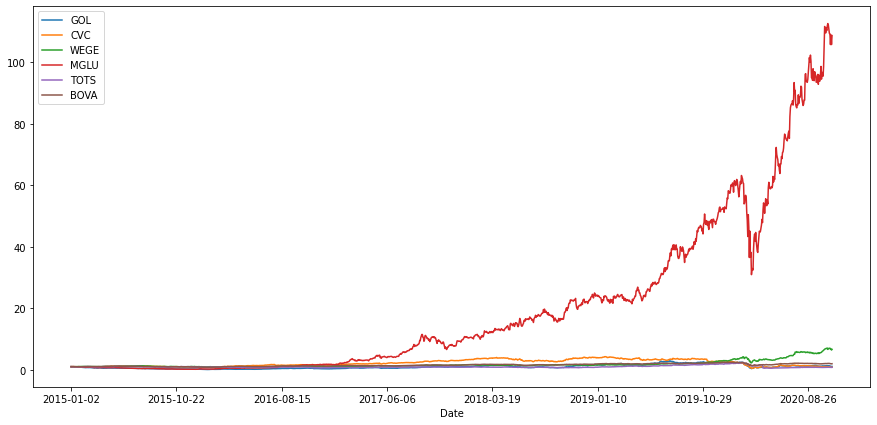

In [ ]:
dataset_normalizado.plot(x='Date', figsize=(15,7));

Como não usaremos a coluna de data(Date), podemos excluí-la:

In [ ]:
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

Como ja visto anteriormente, vamos utilizar o calculo de Retorno Simples, pois vamos comparar varias ações diferentes em um mesmo período de tempo:

In [ ]:
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
retorno_carteira.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477


Retorno Anual

Note que são os mesmos valores obtidos anteriormente, quando feito o calculo individual de cada ação

In [ ]:
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

GOL     0.332390
CVC     0.118761
WEGE    0.383519
MGLU    1.012430
TOTS    0.104341
BOVA    0.151340
dtype: float64

Em porcentagem:

In [ ]:
retorno_anual = retorno_anual * 100
retorno_anual

GOL      33.238978
CVC      11.876079
WEGE     38.351907
MGLU    101.242985
TOTS     10.434068
BOVA     15.133989
dtype: float64

Agora que pegamos os retornos individuais de cada ação, vamos realizar o **Calculo de Retorno da Carteira**

Para isso vamos definir o peso de cada ação na carteira. Normalmente esse peso se da pela quantidade de cada ações que a carteira possui.
Vamos simular que temos a mesma quantidade de cada ação, logo, cada uma das 5 ações representam 20% da carteira

(Nao utilizaremos o BOVA)

In [ ]:
pesos_carteira1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

Lembrando que o somatorio dessa variavel precisar ser 1 (100%):

In [ ]:
pesos_carteira1.sum()

1.0

Para multiplicar os valores com os pesos e fazer o somatorio utilizaremos o funcao do Numpy **dot()** 

In [ ]:
np.dot(retorno_anual, pesos_carteira1)

39.028803339438035

Com o resultado anterior obtido podemos concluir que ao investir nessas 5 empresas (GOL, CVC, WEGE, MGLU, TOTS) teremos um Retorno Medio Anual de 39%

Vamos ver um exemplo onde as acoes possuem quantidades diferentes na carteira:

In [ ]:
pesos_carteira2 = np.array([0.1, 0.2, 0.2, 0.4, 0.1, 0.0])

In [ ]:
np.dot(retorno_anual, pesos_carteira2)

54.91009567500561

Note que agora obtivemos uma Taxa Anual de Retorno de 54%

## Gráfico de carteira x BOVA

Agora vamos comparar o valor da nossa carteira, com o valor da BOVA

In [ ]:
dataset = pd.read_csv("acoes.csv")

In [ ]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])
dataset_normalizado.head()


,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006812,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991879,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980517,1.038928,0.902234,1.018832
4,2015-01-08,0.951968,0.930921,0.997071,1.030875,0.923184,1.026449


Criando uma nova coluna com a Media dos valores:

In [ ]:
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['GOL'] + dataset_normalizado['CVC'] + 
                                   dataset_normalizado['WEGE'] + dataset_normalizado['MGLU'] + 
                                   dataset_normalizado['TOTS']) / 5
dataset_normalizado.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006812,1.018792,0.969274,0.980110,0.994476
2,2015-01-06,1.014676,0.973684,0.991879,1.005369,0.908659,0.985612,0.978854
3,2015-01-07,0.970647,0.965132,0.980517,1.038928,0.902234,1.018832,0.971492
4,2015-01-08,0.951968,0.930921,0.997071,1.030875,0.923184,1.026449,0.966804


Vamos representar em um grafico interativo:

In [ ]:
figura = px.line(title='Comparativo Carteira vs BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x=dataset_normalizado['Date'], y=dataset_normalizado[i], name=i)
figura.show()

Vamos comparar somente Carteira vs BOVA:

In [ ]:
# Excluindo os papeis que nao vamos usar
dataset_normalizado.drop(['GOL','CVC','WEGE','MGLU','TOTS'], axis=1, inplace=True)
dataset_normalizado

,Date,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000
1,2015-01-05,0.980110,0.994476
2,2015-01-06,0.985612,0.978854
3,2015-01-07,1.018832,0.971492
4,2015-01-08,1.026449,0.966804
...,...,...,...
1441,2020-10-27,2.027084,23.862613
1442,2020-10-28,1.955777,23.042527
1443,2020-10-29,1.965933,23.684946
1444,2020-10-30,1.918324,22.960987


In [ ]:
figura = px.line(title='Comparativo Carteira vs BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x=dataset_normalizado['Date'], y=dataset_normalizado[i], name=i)
figura.show()

Por fim, podemos ver que nossa carteira teve um retorno melhor que o BOVA